## Final Project Submission


Please fill out:
* Student name: Leshmi Jayakumar
* Student pace: Part time 
* Scheduled project review date/time: 26/02/2023
* Instructor name: Hardik Idnani



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignores warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import pylab

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics




### Column Names and descriptions for Insurance Data Set

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Base Model 

In [2]:
dfi=pd.read_csv('insurance_prl.csv')

In [3]:
dfi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dfi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df=dfi.drop_duplicates()

In [7]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Visualization of data and checking outliners

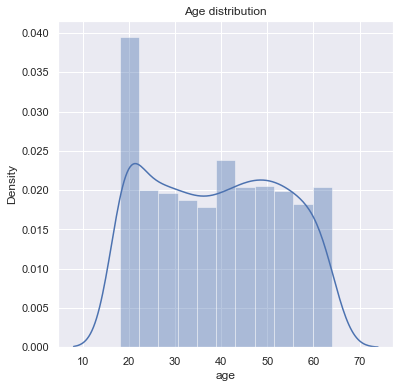

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

#### Here we can see most of our age group in our dataset is between 20-30 age group

In [9]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

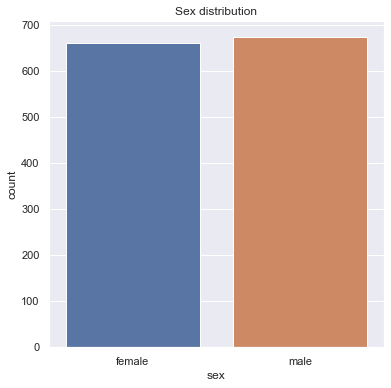

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex distribution')
plt.show()

###### Here we can see the no of male is between 650 t0 700

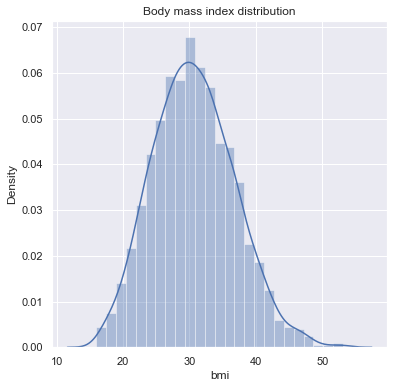

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('Body mass index distribution')
plt.show()

###### Here we can see it is normally disrtibution and there is outliner

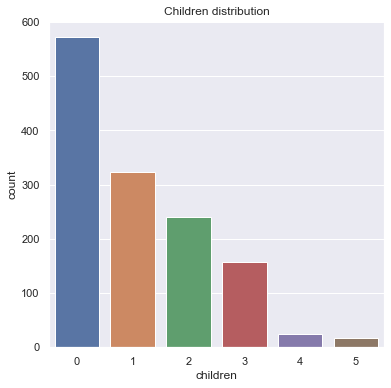

In [12]:

plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children distribution')
plt.show()

###### Here we can see there are more number of peole who no children

In [13]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

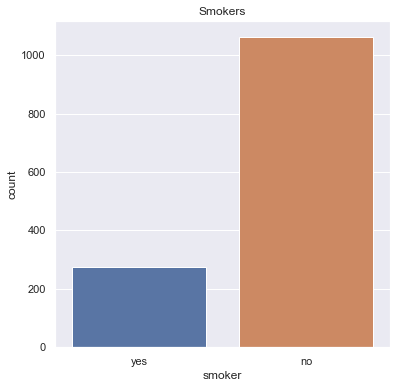

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smokers')
plt.show()

###### Here we can see there are less no:of smokers

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

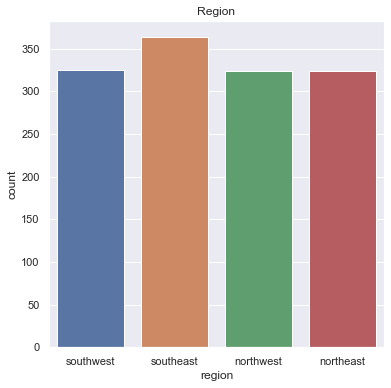

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

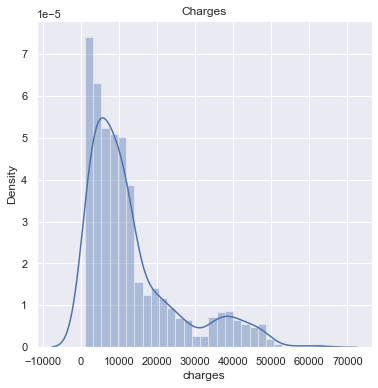

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges')
plt.show()

There are three catogorical columns-
smokers, region and sex
Here we will replace the values to numerical values


In [19]:
#Changing the catagorical variable to numerical variable

df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southwest':1,'southeast':2,'northwest':3,'northeast':4}},inplace=True)

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,4,2205.98080
1335,18,1,36.850,0,1,2,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [21]:
outcome = 'charges'
x_cols = df.drop('charges',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:07:09   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.046e+04   1126.526      9.287      0.000    8252.296    1.27e+04
age          257.2032     11.899     21.616      0.000     233.861     280.546
sex          129.4009    333.059      0.389      0.698    -523.978     782.779
bmi          332.5957     27.733     11.993      0.000     278.191     387.000
children     478.7717    137.732      3.476      0.001     208.576     748.967
smoker     -2.382e+04    412.051    -57.806      0.000   -2.46e+04    -2.3e+04
region       354.0097    151.995      2.329      0.020      55.834     652.185
==============================================================================
Omnibus:                      298.466   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.712
Skew:                           1.206   Prob(JB):                    2.84e-155
Kurtosis:                       5.637   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

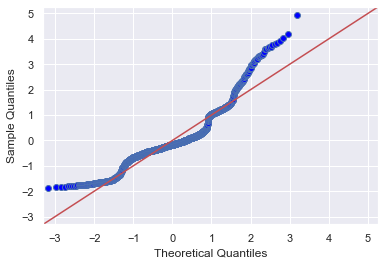

In [22]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=df).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);

### Creating Dummies

In [23]:
dummy_1= pd.get_dummies(data=df, columns=['sex'],prefix='s', drop_first=True)
dummy_1
dummy_2= pd.get_dummies(data=dummy_1, columns=['smoker'],prefix='sm', drop_first=True)
dummy_2
dummy_3= pd.get_dummies(data=dummy_2, columns=['children'],prefix='ch', drop_first=True)
dummy_3
dummy_4= pd.get_dummies(data=dummy_3, columns=['region'],prefix='reg', drop_first=True)
dummy_4



,age,bmi,charges,s_1,sm_1,ch_1,ch_2,ch_3,ch_4,ch_5,reg_2,reg_3,reg_4
0,19,27.900,16884.92400,1,0,0,0,0,0,0,0,0,0
1,18,33.770,1725.55230,0,1,1,0,0,0,0,1,0,0
2,28,33.000,4449.46200,0,1,0,0,1,0,0,1,0,0
3,33,22.705,21984.47061,0,1,0,0,0,0,0,0,1,0
4,32,28.880,3866.85520,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,0,0,1,0,0,0,1,0
1334,18,31.920,2205.98080,1,1,0,0,0,0,0,0,0,1
1335,18,36.850,1629.83350,1,1,0,0,0,0,0,1,0,0
1336,21,25.800,2007.94500,1,1,0,0,0,0,0,0,0,0


In [24]:
outcome = 'charges'
x_cols = dummy_4.drop('charges',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dummy_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.1
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:07:10   Log-Likelihood:                -13535.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1324   BIC:                         2.716e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.083e+04   1077.752     10.050      0.000    8716.671    1.29e+04
age          257.1083     11.928     21.556      0.000     233.709     280.507
bmi          336.9626     28.624     11.772      0.000     280.809     393.116
s_1          126.4424    333.085      0.380      0.704    -526.990     779.875
sm_1       -2.384e+04    414.334    -57.527      0.000   -2.46e+04    -2.3e+04
ch_1         389.0683    421.630      0.923      0.356    -438.068    1216.205
ch_2        1633.7392    466.970      3.499      0.000     717.657    2549.822
ch_3         962.4373    548.394      1.755      0.079    -113.378    2038.253
ch_4        2945.1623   1239.673      2.376      0.018     513.225    5377.099
ch_5        1114.2598   1456.578      0.765      0.444   -1743.193    3971.712
reg_2        -80.4056    470.732     -0.171      0.864   -1003.867     843.056
reg_3        576.4105    478.999      1.203      0.229    -363.270    1516.091
reg_4        952.9217    478.328      1.992      0.047      14.558    1891.285
==============================================================================
Omnibus:                      293.461   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.568
Skew:                           1.190   Prob(JB):                    2.48e-151
Kurtosis:                       5.604   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
dff1=dummy_4.drop(['s_1','ch_1','ch_5','reg_2','reg_3','reg_4'],axis=1)
dff1

,age,bmi,charges,sm_1,ch_2,ch_3,ch_4
0,19,27.900,16884.92400,0,0,0,0
1,18,33.770,1725.55230,1,0,0,0
2,28,33.000,4449.46200,1,0,1,0
3,33,22.705,21984.47061,1,0,0,0
4,32,28.880,3866.85520,1,0,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,1,0
1334,18,31.920,2205.98080,1,0,0,0
1335,18,36.850,1629.83350,1,0,0,0
1336,21,25.800,2007.94500,1,0,0,0


In [26]:
outcome = 'charges'
x_cols = dff1.drop('charges',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dff1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     666.4
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:07:10   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.184e+04    986.732     12.004      0.000    9908.977    1.38e+04
age          258.1182     11.913     21.667      0.000     234.748     281.489
bmi          319.6454     27.372     11.678      0.000     265.948     373.343
sm_1       -2.378e+04    411.730    -57.763      0.000   -2.46e+04    -2.3e+04
ch_2        1477.7344    440.236      3.357      0.001     614.101    2341.367
ch_3         848.3077    525.419      1.615      0.107    -182.433    1879.049
ch_4        2834.1479   1229.852      2.304      0.021     421.486    5246.810
==============================================================================
Omnibus:                      295.108   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.275
Skew:                           1.197   Prob(JB):                    3.88e-152
Kurtosis:                       5.605   Cond. No.                         381.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
dff2=dff1.drop(['ch_3'],axis=1)
dff2

,age,bmi,charges,sm_1,ch_2,ch_4
0,19,27.900,16884.92400,0,0,0
1,18,33.770,1725.55230,1,0,0
2,28,33.000,4449.46200,1,0,0
3,33,22.705,21984.47061,1,0,0
4,32,28.880,3866.85520,1,0,0
...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0
1334,18,31.920,2205.98080,1,0,0
1335,18,36.850,1629.83350,1,0,0
1336,21,25.800,2007.94500,1,0,0


In [28]:
outcome = 'charges'
x_cols = dff2.drop('charges',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dff2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.2
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:07:10   Log-Likelihood:                -13540.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.195e+04    985.355     12.123      0.000       1e+04    1.39e+04
age          259.3494     11.896     21.802      0.000     236.013     282.686
bmi          319.6190     27.389     11.670      0.000     265.889     373.349
sm_1       -2.381e+04    411.564    -57.859      0.000   -2.46e+04    -2.3e+04
ch_2        1352.3495    433.594      3.119      0.002     501.748    2202.951
ch_4        2712.5801   1228.286      2.208      0.027     302.993    5122.167
==============================================================================
Omnibus:                      291.437   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.388
Skew:                           1.187   Prob(JB):                    1.09e-148
Kurtosis:                       5.568   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

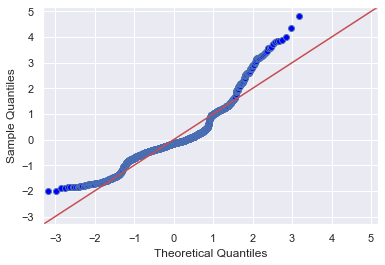

In [29]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=dff2).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);

In [30]:
#Independent varialbe
X=dff2.drop(columns='charges',axis=1)
#Dependent variable
y=dff2['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)


In [32]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
y_predict_train= lm.predict(X_train)
y_predict_train

array([11296.01066886,  5381.7702395 , 15554.13010863, ...,
       13686.1410004 ,  5677.50932887,  9294.23709869])

In [34]:
y_predict_test= lm.predict(X_test)
acc_linreg=metrics.r2_score(y_test,y_predict_test)
y_predict_test

array([ 9962.96020182,  2690.26793395,  3696.1971618 , 14225.13322934,
        8423.72214909,   243.3035617 , 15105.77784165,  6503.95195717,
       10602.82309429,  5735.97605701, 10235.48391501, 11493.15417901,
       14767.69728615, 12615.5202823 ,  9502.85753452, 37487.76580082,
        8550.34207778, 12674.03465875, 15550.27572744, 14292.34665875,
         275.22994067, 28695.83887208, 33253.25727924, 13393.12018563,
       26798.19559806, 25612.52096597, 11805.44977087, 13351.37059694,
        6443.20106603,  6098.73224034,  5670.78798593,  8880.97267559,
        3047.14150664,  3296.8691343 ,   333.39929453,  5225.15399356,
        8161.54212612, 10979.21829894, 14077.8079138 ,   410.05234148,
       10763.64161513, 33509.32265766,  9062.90694622,  9714.56788731,
       31287.60949181,  6537.59437036, 28030.42592099,  2949.18832429,
       33632.96263595,  2151.02885014,  -410.9894361 ,  3052.82491072,
        7069.43401588,  9291.62894163,  3462.1844332 , 14168.5460435 ,
      

In [35]:
#model evaluation
print('R^2:',metrics.r2_score(y_train, y_predict_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict_train))
print('MSE:',metrics.mean_squared_error(y_train, y_predict_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict_train)))

R^2: 0.7475991591346649
Adjusted R^2: 0.7464119491588166
MAE: 4242.39872111041
MSE: 36658430.20228838
RMSE: 6054.620566335134


In [36]:
#model evaluation-testing prediction

print('R^2:',acc_linreg)
print('Adjusted R^2:', 1- (1-metrics.r2_score(y_test,y_predict_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict_test))
print('MSE:',metrics.mean_squared_error(y_test, y_predict_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict_test)))

R^2: 0.7559022400879338
Adjusted R^2: 0.7512438858911387
MAE: 4099.324686626276
MSE: 37035796.83181868
RMSE: 6085.704300392739


In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
variance=train_mse-test_mse
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Variance:',variance)                               

Train Mean Squared Error: 36658430.20228838
Test Mean Squared Error: 37035796.83181868
Variance: -377366.62953029573


In [39]:
variance=train_mse-test_mse
print('Variance:',variance)

Variance: -377366.62953029573


## Iteration 1-Log transform

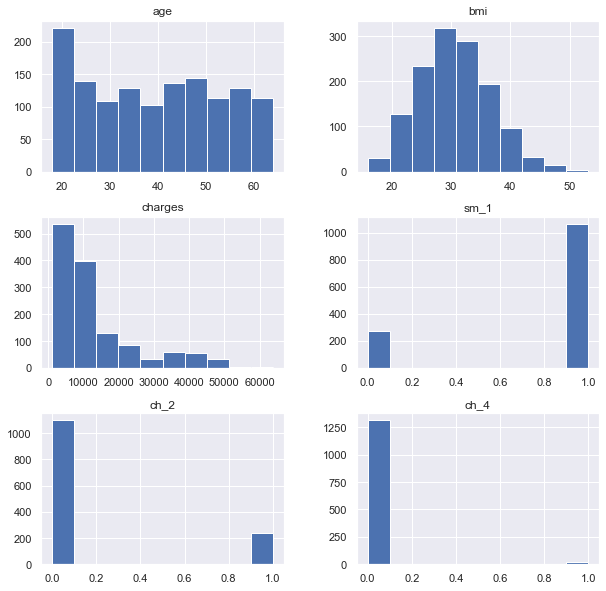

In [40]:
#Histogram for each features -before log transform
dff2.hist(bins=10,figsize=(10,10))
plt.show()

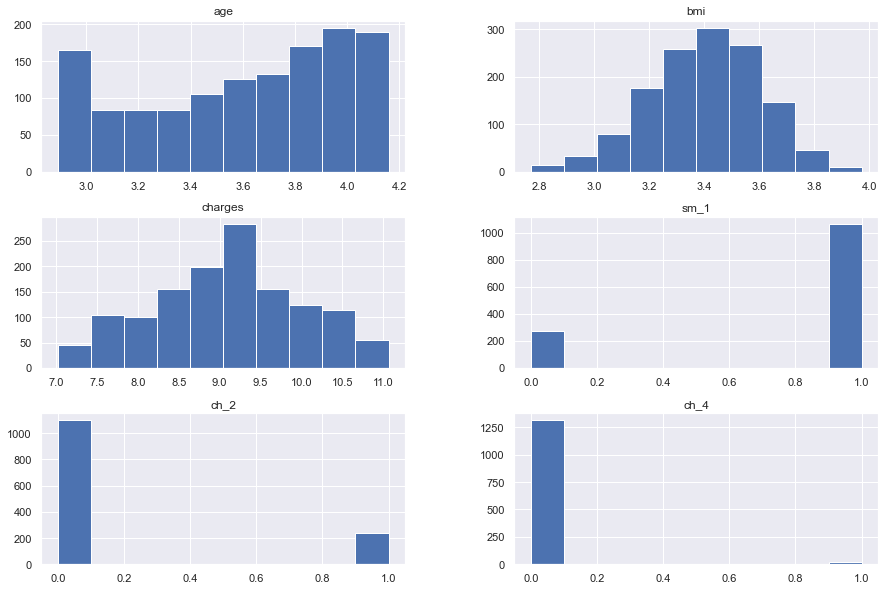

In [41]:
d_log = dff2
d_log['age'] = np.log(dff2['age'])
d_log['bmi'] = np.log(dff2['bmi'])
d_log['charges']=np.log(dff2['charges'])

d_log.hist(figsize  = [15,10 ]);


In [42]:
d_log

,age,bmi,charges,sm_1,ch_2,ch_4
0,2.944439,3.328627,9.734176,0,0,0
1,2.890372,3.519573,7.453302,1,0,0
2,3.332205,3.496508,8.400538,1,0,0
3,3.496508,3.122585,9.998092,1,0,0
4,3.465736,3.363149,8.260197,1,0,0
...,...,...,...,...,...,...
1333,3.912023,3.433019,9.268661,1,0,0
1334,2.890372,3.463233,7.698927,1,0,0
1335,2.890372,3.606856,7.396233,1,0,0
1336,3.044522,3.250374,7.604867,1,0,0


In [43]:
outcome = 'charges'
x_cols = d_log.drop('charges',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=d_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     836.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:07:13   Log-Likelihood:                -833.25
No. Observations:                1337   AIC:                             1679.
Df Residuals:                    1331   BIC:                             1710.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5500      0.229     19.896      0.000       4.101       4.999
age            1.2680      0.032     39.726      0.000       1.205       1.331
bmi            0.3465      0.061      5.636      0.000       0.226       0.467
sm_1          -1.5427      0.031    -50.292      0.000      -1.603      -1.483
ch_2           0.1563      0.032      4.834      0.000       0.093       0.220
ch_4           0.3954      0.092      4.318      0.000       0.216       0.575
==============================================================================
Omnibus:                      444.157   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1499.450
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                       7.035   Cond. No.                         97.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

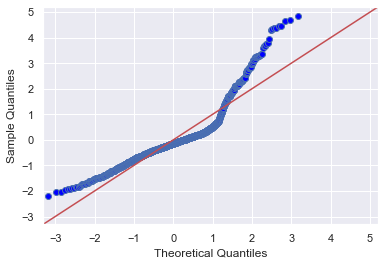

In [44]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=d_log).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);

In [45]:
#Independent varialbe
X=d_log.drop(columns='charges',axis=1)
#Dependent variable
y=d_log['charges']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)


In [48]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
c=lm.intercept_
c

4.598806931019106

In [50]:
m=lm.coef_
m


array([ 1.23655022,  0.36351017, -1.53079084,  0.11761011,  0.3077766 ])

In [51]:
y_predict_train= lm.predict(X_train)
y_predict_train

array([9.07591817, 7.96707418, 9.28732684, ..., 9.34942685, 7.97533613,
       9.10578018])

In [52]:
y_predict_test= lm.predict(X_test)
acc_linreg=metrics.r2_score(y_test,y_predict_test)
y_predict_test

array([ 8.87917035,  7.99373076,  8.54168683,  9.33687136,  8.40812205,
        7.78173189,  9.43357484,  8.71337841,  9.12614768,  8.48200713,
        8.99873967,  9.20455436,  9.53135396,  9.34981267,  8.97472451,
       10.93310237,  8.98179742,  9.21008851,  9.38922698,  9.33882572,
        7.7832309 ,  9.92408523, 10.64227963,  9.35324766,  9.54775699,
        9.44974326,  9.25844095,  9.24385575,  8.88829429,  8.870431  ,
        7.97515043,  8.95668957,  7.95241225,  8.01583899,  7.84099951,
        8.46382784,  8.9830919 ,  9.13913985,  9.4250687 ,  7.89601487,
        9.21865237, 10.54643085,  9.14067529,  9.07748955, 10.36444483,
        8.16900164,  9.9001964 ,  8.23042504, 10.38989959,  8.19537767,
        7.80335408,  7.89447636,  8.61053429,  8.80934581,  7.96679962,
        9.42817516, 10.44405701,  9.19006761,  8.90837988,  7.92796022,
        9.13156255,  8.99231848, 10.24162272,  9.24962347,  9.58613086,
        9.41688529,  8.32273775,  8.29587212,  9.52191844, 10.92

In [53]:
#model evaluation
print('R^2:',metrics.r2_score(y_train, y_predict_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict_train))
print('MSE:',metrics.mean_squared_error(y_train, y_predict_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict_train)))

R^2: 0.7508321808748831
Adjusted R^2: 0.7496601779627237
MAE: 0.30139369976041896
MSE: 0.20785598472780825
RMSE: 0.45591225551394016


In [54]:
#model evaluation-testing prediction

print('R^2:',acc_linreg)
print('Adjusted R^2:', 1- (1-metrics.r2_score(y_test,y_predict_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_predict_test))
print('MSE:',metrics.mean_squared_error(y_test, y_predict_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict_test)))

R^2: 0.7842170604969696
Adjusted R^2: 0.7800990654682858
MAE: 0.2926671482776501
MSE: 0.18956530099829216
RMSE: 0.4353909748700496


In [55]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 5) (1069, 5) (268, 5)


In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
variance=train_mse-test_mse
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Variance:',variance)                                

Train Mean Squared Error: 0.20785598472780825
Test Mean Squared Error: 0.18956530099829216
Variance: 0.01829068372951609


In [58]:
variance= train_mse - test_mse
variance


0.01829068372951609

In [59]:
d_log.corr()

,age,bmi,charges,sm_1,ch_2,ch_4
age,1.000000,0.109659,0.533992,0.023274,0.035445,0.005170
bmi,0.109659,1.000000,0.138222,-0.000399,0.017343,0.022925
charges,0.533992,0.138222,1.000000,-0.665718,0.101015,0.038944
sm_1,0.023274,-0.000399,-0.665718,1.000000,-0.028077,0.029046
ch_2,0.035445,0.017343,0.101015,-0.028077,1.000000,-0.064566
ch_4,0.005170,0.022925,0.038944,0.029046,-0.064566,1.000000


<AxesSubplot:>

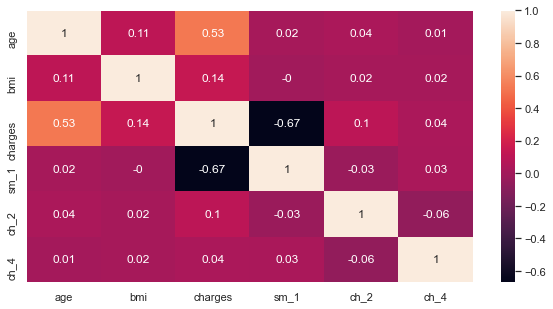

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(d_log.corr().round(2),annot=True)

## Polynomial Regression



In [61]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.preprocessing import PolynomialFeatures
x = d_log.drop(['charges'], axis = 1)
y = d_log.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-0.5338604523150714
[ 0.          0.32116891  4.08356927 -0.23954045  1.01578563  0.34267336
  0.05912651 -0.0963124   1.13628595 -0.42315143 -0.9938306  -0.32837518
 -1.51787556 -0.12906876  0.78398916 -0.23954045  0.11804948  0.69483672
  1.01578563  0.          0.34267336]
0.8370466230055339


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 0.22463884111700938
Mean Squared Error: 0.1501548127586702
Root Mean Squared Error: 0.38749814549062067


In [63]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.23740596949324314
Mean Squared Error: 0.14656285738843813
Root Mean Squared Error: 0.3828352875434005


In [64]:
##Predicting the charges
y_test_charges = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred,'Variance':y_test-y_test_pred})
dfp

,Actual,Predicted,Variance
1248,7.398763,7.663362,-0.264599
610,9.053417,9.142139,-0.088723
393,9.136709,9.205100,-0.068391
503,10.390482,10.063189,0.327292
198,9.174117,9.210311,-0.036194
...,...,...,...
809,8.104641,8.153760,-0.049120
726,8.804578,8.926495,-0.121916
938,7.742403,8.166279,-0.423876
474,10.141807,10.199920,-0.058113


In [65]:
##Predicting the charges
y_train_charges = Pol_reg.predict(x_train)
##Comparing the actual output values with the predicted values
dfp1 = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred,'variance':y_train-y_train_pred})
dfp1

,Actual,Predicted,variance
896,9.893339,9.768671,0.124668
194,7.036562,7.675671,-0.639110
240,10.558716,10.655066,-0.096350
1257,9.333083,9.364757,-0.031674
575,9.411066,9.480065,-0.068998
...,...,...,...
764,9.115488,9.191096,-0.075608
836,8.389867,8.721590,-0.331722
1217,8.308474,8.633651,-0.325177
559,7.406364,7.753048,-0.346684


###### The End